# Data Massaging II
 * Uso avanzado de pandas
 * Primeros analisis
 * Combinacion de dataframes
 

In [34]:
#Importar el archivo de netflix
import pandas as pd
df = pd.read_csv('netflix_titles.csv')
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,season


In [2]:
df.describe()

,release_year,duration_num
count,8807.000000,8807.000000
mean,2014.180198,69.848530
std,8.819312,50.806431
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [5]:
#tambien se pueden obtener estadisticas aisladas
print('Media=', df['duration_num'].mean())
print('Min=', df['duration_num'].min())
print('Max=', df['duration_num'].max())

Media= 69.84852957874418
Min= 1
Max= 312


In [7]:
#Agregacion de datos, si es pelicula (min) o serie (season)
#Cuenta cuantos son
df.groupby("duration_unit").size()

duration_unit
min       6131
season    2676
dtype: int64

<Axes: xlabel='duration_unit'>

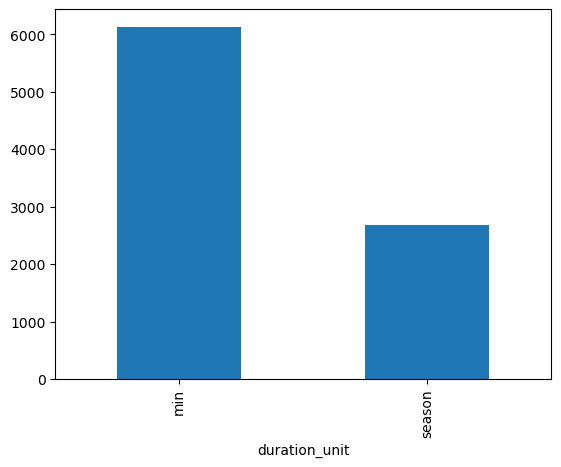

In [8]:
#Del dato anterior agregamos un grafico de barra simple con el numero de peliculas y series
df.groupby("duration_unit").size().plot.bar()

# Como calcular el total en horas tanto de peliculas como en series
 * Las peliculas vienen en minutos, por lo que el numero total simplemente se deberia dividir para 60 minutos

In [13]:
#Tambien se puede hacer la suma
movies_minutos = df.loc[df['duration_unit'] == 'min', 'duration_num'].sum() 

#Muestra las estadisticas con 2 decimales
print(f"Total de minutos para peliculas = {movies_minutos:.2f}")
print(f'Total de Horas para peliculas = {movies_minutos/60:.2f}')  

Total de minutos para peliculas = 610433.00
Total de Horas para peliculas = 10173.88


* Las series se tienen que calculas
* Ahora se calcula la cantidad de season
* Se asume que cada season tiene un promedio de 7 episodios
* Y que cada episodio dura 30 minutos
* Se asume que cada season tiene un promedio de 7 episodios
* Y cada episodio dura 30 minutos
* Asi, si es que una serie tiene 1 season = 7*30 = 210 minutos

In [15]:
#Largo en minutos
len_season_min = 7 * 30
len_season_hr = len_season_min / 60
print(len_season_hr)

3.5


In [16]:
#Calcula el total de seasons del dataset
total_series = df.loc[df['duration_unit'] == 'season', 'duration_num'].sum() 
print('Total de horas en seasons =', total_series)

#Ahora se multimplica el total de horas en season por el largo de cada season
total_movies_hr = total_series * len_season_hr
print('Total de horas en series = ', total_movies_hr)

Total de horas en seasons = 4723
Total de horas en series =  16530.5


In [17]:
# Otra pregunyta, las peliculas son mas largas segun su rating?
df[['title', 'country', 'release_year', 'duration_num', 'rating']].loc[(df['duration_unit'] == 'min')]

,title,country,release_year,duration_num,rating
0,Dick Johnson Is Dead,United States,2020,90,PG-13
6,My Little Pony: A New Generation,NaN,2021,91,PG
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125,TV-MA
9,The Starling,United States,2021,104,PG-13
12,Je Suis Karl,"Germany, Czech Republic",2021,127,TV-MA
...,...,...,...,...,...
8801,Zinzana,"United Arab Emirates, Jordan",2015,96,TV-MA
8802,Zodiac,United States,2007,158,R
8804,Zombieland,United States,2009,88,R
8805,Zoom,United States,2006,88,PG


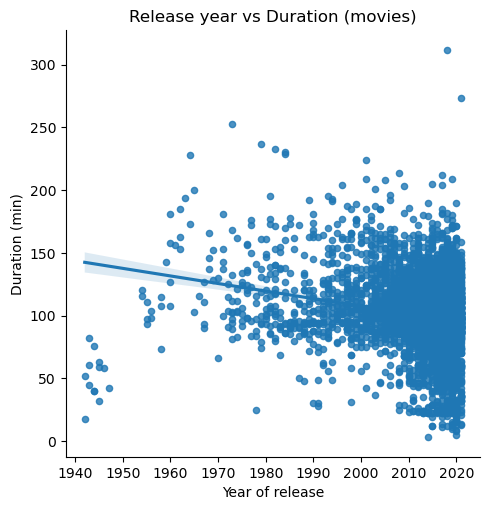

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df_movies = df[['title', 'country', 'release_year', 'duration_num', 'rating']].loc[(df['duration_unit'] == 'min')]
sns.lmplot(x='release_year', y='duration_num', data=df_movies, fit_reg=True, scatter_kws={"marker": "D", "s":20})

plt.title('Release year vs Duration (movies)')
plt.xlabel('Year of release')
plt.ylabel('Duration (min)')
plt.show()

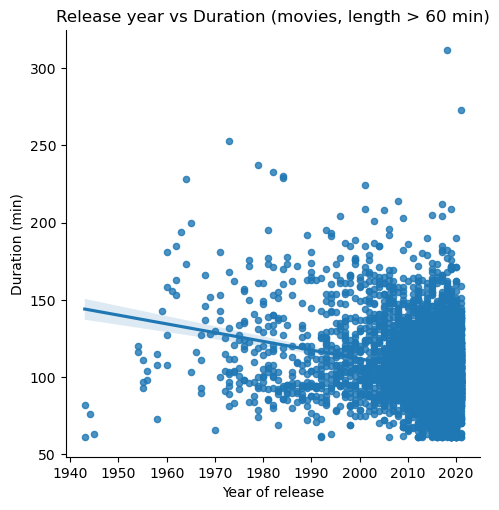

In [22]:
#Que pasaria si es que se toman en cuenta nada mas peliculas de por lo menos 60 minutos?
df_movies_2 = df[['title', 'country', 'release_year', 'duration_num', 'rating']].loc[(df['duration_unit'] == 'min') & (df['duration_num'] > 60)]
sns.lmplot(x='release_year', y='duration_num', data=df_movies_2, fit_reg=True, scatter_kws={"marker": "D", "s":20})

plt.title('Release year vs Duration (movies, length > 60 min)')
plt.xlabel('Year of release')
plt.ylabel('Duration (min)')
plt.show()

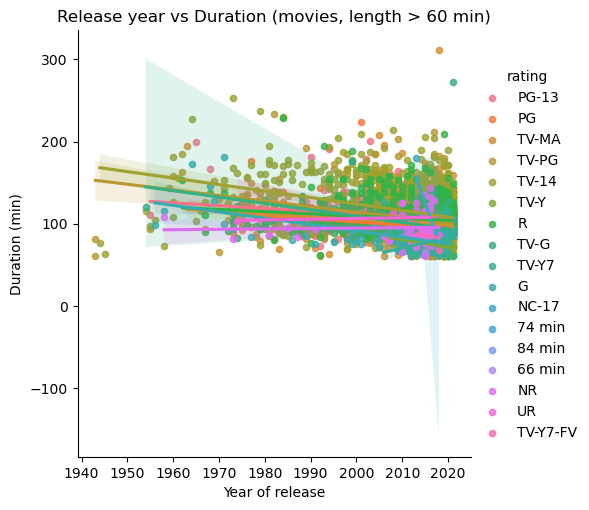

In [23]:
#Se conesta la pregunta anterior
#Con el hue le metemos ese identificador por colores

df_movies_2 = df[['title', 'country', 'release_year', 'duration_num', 'rating']].loc[(df['duration_unit'] == 'min') & (df['duration_num'] > 60)]
sns.lmplot(x='release_year', y='duration_num', data=df_movies_2, hue="rating", fit_reg=True, scatter_kws={"marker": "D", "s":20})

plt.title('Release year vs Duration (movies, length > 60 min)')
plt.xlabel('Year of release')
plt.ylabel('Duration (min)')
plt.show()

In [25]:
#Agrupaciones simples
df.groupby("type").count()['show_id']

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [ ]:
#Agrupaciones por pais
#Sacando el top 10
df.groupby("country").count()['show_id'].sort_values(ascending=False)[0:10]

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: show_id, dtype: int64

<Axes: xlabel='country'>

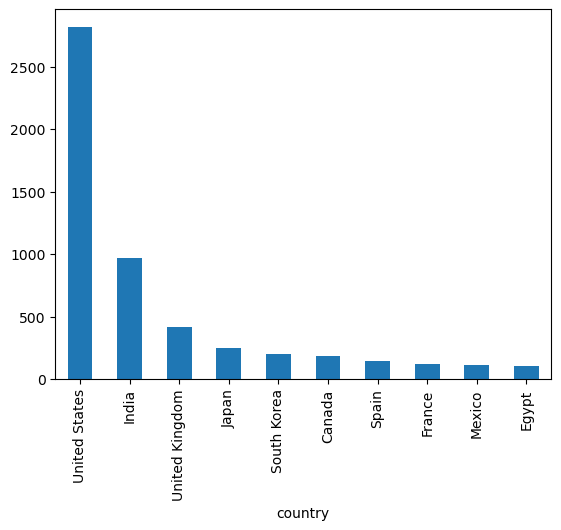

In [27]:
#hacer un grafico de barras con la informacion anterior
df.groupby("country").count()['show_id'].sort_values(ascending=False)[0:10].plot.bar()

<Axes: ylabel='show_id'>

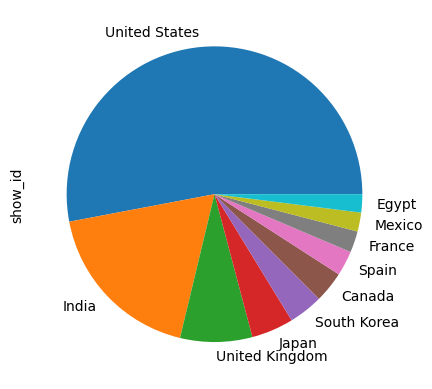

In [29]:
#hacer un grafico de pie con la informacion anterior
df.groupby("country").count()['show_id'].sort_values(ascending=False)[0:10].plot.pie()

In [30]:
#Peliculas por rating
df.groupby("rating").count()['show_id'].sort_values(ascending=False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: show_id, dtype: int64

In [31]:
#Peliculas por rating
#Saco el top 5
df.groupby("rating").count()['show_id'].sort_values(ascending=False)[0:5]

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: show_id, dtype: int64

<Axes: ylabel='show_id'>

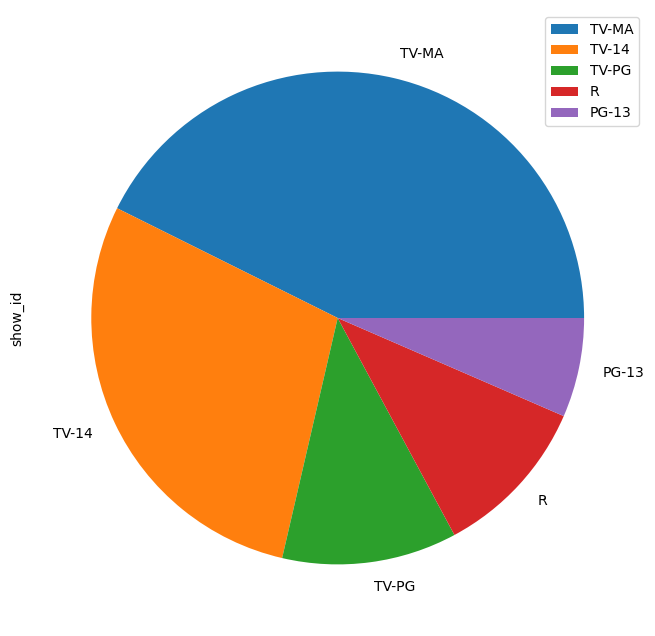

In [32]:
#Hacer el pie y ponerle algunas caracteristicas adicionales
df.groupby("rating").count()['show_id'].sort_values(ascending=False)[0:5].plot.pie(y='rating', figsize=(8,8), legend=True )

# Combinacion y manejo de Dataframes

In [36]:
#Nuevo Dataframe
import pandas as pd

clase = [('Jorge', 22, 'MX'),
        ('Anita', 31, 'MX'),
        ('Raul', 16, 'BR'),
        ('Simon', 41, 'BR'),
        ('Diego', 33, 'PA'),
        ('Jorge', 35, 'PA'),
        ('Almendra', 35, 'COL'),
        ('Mary', 35, 'COL'),
        ('Peter', 33, 'EC'),]

df_clase = pd.DataFrame(clase, columns=['Nombre', 'Edad', 'Pais'])
df_clase

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,33,EC


In [37]:
clase2 = [('Mauricio', 22, 'MX'),
        ('Gladys', 31, 'MX'),
        ('Sebastian', 16, 'BR')]

df_clase2 = pd.DataFrame(clase2, columns=['Nombre', 'Edad', 'Pais'])
df_clase2

,Nombre,Edad,Pais
0,Mauricio,22,MX
1,Gladys,31,MX
2,Sebastian,16,BR


In [ ]:
# Con el uso del comando append, ESE COMANDO YA NO FUNCIONA
#df_clase.append(df_clase2)

AttributeError: 'DataFrame' object has no attribute 'append'

In [38]:
df_clase = pd.concat([df_clase, df_clase2], ignore_index=True)

In [20]:
df_clase

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,33,EC
9,Mauricio,22,MX


In [21]:
#Reindexacion
df_clase.reset_index(level=None, drop=True, inplace=True)
df_clase

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,33,EC
9,Mauricio,22,MX


## Eliminacion de datos

In [22]:
df_ClaseElim = df_clase
df_ClaseElim 

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,33,EC
9,Mauricio,22,MX


In [23]:
# Eliminnar el registro # 2 drop
df_ClaseElim.drop(2).head()


,Nombre,Edad,Pais
0,Jorge,22,MX
1,Anita,31,MX
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA


In [24]:
#Elmina 2 al mismo tiempo
df_ClaseElim.drop([7,8], axis=0, inplace=True)

In [25]:
df_ClaseElim

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
9,Mauricio,22,MX
10,Gladys,31,MX
11,Sebastian,16,BR


In [29]:
#Drop con condicion
#Se eliminan los alumsnos con menos de 40 a;os
#Registros que cumplen la condicion (esto puede ser una forma de visualizar primero que es lo que vas a hacer)
df_ClaseElim[df_ClaseElim['Edad'] < 40]

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
9,Mauricio,22,MX
10,Gladys,31,MX
11,Sebastian,16,BR


In [30]:
#Ahora hay que borrar los datos
df_ClaseElim.drop(df_ClaseElim[df_ClaseElim['Edad'] < 40].index, inplace=True)

In [31]:
df_ClaseElim

,Nombre,Edad,Pais
3,Simon,41,BR


## Actualizacion de Datos

In [32]:
df_claseUpd = df_clase

In [43]:
#Para tener un nuevo dataframe copia del original con el cual trabajar
df_ClaseUp = df_clase
df_ClaseUp

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,33,EC
9,Mauricio,22,MX


In [44]:
# Actualizar datos de un Dataframe
# Usando iloc
df_claseUpd.loc[3,'Nombre'] = 'Ramon'

In [45]:
df_claseUpd

,Nombre,Edad,Pais
3,Ramon,41,BR


In [49]:
#Condicion
df_clase2

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,33,EC
9,Mauricio,22,MX


In [52]:
# Actualizar basado en una condicion
# Rebaja un a;o la edad
df_clase2.loc[(df_clase2[df_clase2['Edad'] == 41].index), 'Edad'] = 40

In [53]:
df_clase2

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,40,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,33,EC
9,Mauricio,22,MX


## Merge de DataFrames

In [58]:
clase = clase = [('Jorge', 22, 'MX'),
        ('Ana', 31, 'MX'),
        ('Raul', 16, 'BR'),
        ('Simon', 41, 'BR'),
        ('Diego', 33, 'PA'),
        ('Jorge', 35, 'PA'),
        ('Almond', 35, 'COL'),
        ('Mary', 35, 'COL'),
        ('Peter', 33, 'EC'),]

df_clase3 = pd.DataFrame(clase, columns=['Nombre', 'Edad', 'Pais'])
df_clase3

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Ana,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almond,35,COL
7,Mary,35,COL
8,Peter,33,EC


In [59]:
clase = clase = [('Mary', 22, 'MX'),
        ('Peter', 31, 'MX'),
        ('Diego', 16, 'BR'),]

df_clase4 = pd.DataFrame(clase, columns=['Nombre', 'Edad', 'Pais'])
df_clase4

,Nombre,Edad,Pais
0,Mary,22,MX
1,Peter,31,MX
2,Diego,16,BR


In [60]:
df_clase3.merge(df_clase4, left_on='Nombre', right_on='Nombre')

,Nombre,Edad_x,Pais_x,Edad_y,Pais_y
0,Diego,33,PA,16,BR
1,Mary,35,COL,22,MX
2,Peter,33,EC,31,MX


In [63]:
df_clase3.merge(df_clase4, how='inner', on='Nombre')

,Nombre,Edad_x,Pais_x,Edad_y,Pais_y
0,Diego,33,PA,16,BR
1,Mary,35,COL,22,MX
2,Peter,33,EC,31,MX


In [64]:
#Producto Cartesiano
df_clase3.merge(df_clase4, how='cross')

,Nombre_x,Edad_x,Pais_x,Nombre_y,Edad_y,Pais_y
0,Jorge,22,MX,Mary,22,MX
1,Jorge,22,MX,Peter,31,MX
2,Jorge,22,MX,Diego,16,BR
3,Ana,31,MX,Mary,22,MX
4,Ana,31,MX,Peter,31,MX
5,Ana,31,MX,Diego,16,BR
6,Raul,16,BR,Mary,22,MX
7,Raul,16,BR,Peter,31,MX
8,Raul,16,BR,Diego,16,BR
9,Simon,41,BR,Mary,22,MX


## Funciones lambda a un Dataframe
 * Comando Apply

In [1]:
#Nuevo Dataframe
import pandas as pd

clase = [('Jorge', 22, 'MX'),
        ('Anita', 31, 'MX'),
        ('Raul', 16, 'BR'),
        ('Simon', 41, 'BR'),
        ('Diego', 33, 'PA'),
        ('Jorge', 35, 'PA'),
        ('Almendra', 35, 'COL'),
        ('Mary', 35, 'COL'),
        ('Peter', 33, 'EC'),]

df_clase = pd.DataFrame(clase, columns=['Nombre', 'Edad', 'Pais'])
df_clase

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Anita,31,MX
2,Raul,16,BR
3,Simon,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,COL
7,Mary,35,COL
8,Peter,33,EC


In [4]:
#Vamos a ver si la edad es par o impar
# En este caso, edad se envia como parametro a la funcion lambda si Edad / 2 es entero o no
df_clase['Par-Impar'] = df_clase['Edad'].apply(lambda x: "impar" if int(x) % 2 else "Par")

In [5]:
df_clase

,Nombre,Edad,Pais,Par-Impar
0,Jorge,22,MX,Par
1,Anita,31,MX,impar
2,Raul,16,BR,Par
3,Simon,41,BR,impar
4,Diego,33,PA,impar
5,Jorge,35,PA,impar
6,Almendra,35,COL,impar
7,Mary,35,COL,impar
8,Peter,33,EC,impar


In [6]:
df_clase.groupby("Par-Impar").count()['Nombre']

Par-Impar
Par      2
impar    7
Name: Nombre, dtype: int64

<Axes: xlabel='Par-Impar'>

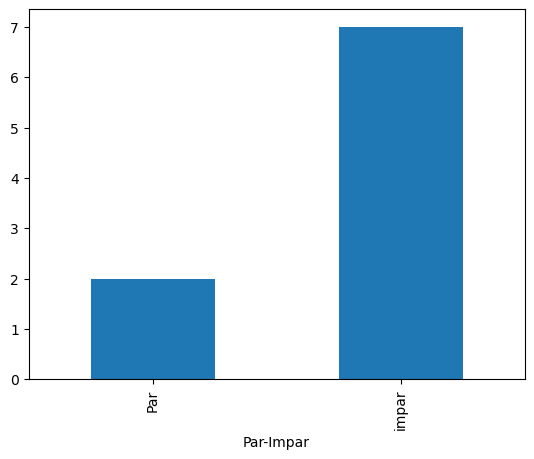

In [7]:
df_clase.groupby("Par-Impar").count()['Nombre'].plot.bar()

In [13]:
#Ejemplo 2, un descuento del 10% a todas las personas mayires de 37 a;os
df_clase['Descuento'] = df_clase['Edad'].apply(lambda x: 0.1 if x > 40 else 0.0)
df_clase

,Nombre,Edad,Pais,Par-Impar,Descuento
0,Jorge,22,MX,Par,0.0
1,Anita,31,MX,impar,0.0
2,Raul,16,BR,Par,0.0
3,Simon,41,BR,impar,0.1
4,Diego,33,PA,impar,0.0
5,Jorge,35,PA,impar,0.0
6,Almendra,35,COL,impar,0.0
7,Mary,35,COL,impar,0.0
8,Peter,33,EC,impar,0.0


In [18]:
df_clase2['Pais'] = df_clase2['Pais'].replace('COL', 'CO')

In [19]:
df_clase2


,Nombre,Edad,Por,Pais
0,Jorge,22,2,MX
1,Anita,31,3,MX
2,Raul,16,4,BR
3,Simon,41,6,BR
4,Diego,33,8,PA
5,Jorge,35,8,PA
6,Almendra,35,9,CO
7,Mary,35,9,CO
8,Peter,33,9,EC


In [20]:
#la libreria pytz nos ayuda a sacar la zona horaria por pais
import pytz
df_clase2['ZonaHoraria'] = df_clase2['Pais'].apply(lambda x: pytz.country_timezones[x])
df_clase2

,Nombre,Edad,Por,Pais,ZonaHoraria
0,Jorge,22,2,MX,"[America/Mexico_City, America/Cancun, America/..."
1,Anita,31,3,MX,"[America/Mexico_City, America/Cancun, America/..."
2,Raul,16,4,BR,"[America/Noronha, America/Belem, America/Forta..."
3,Simon,41,6,BR,"[America/Noronha, America/Belem, America/Forta..."
4,Diego,33,8,PA,[America/Panama]
5,Jorge,35,8,PA,[America/Panama]
6,Almendra,35,9,CO,[America/Bogota]
7,Mary,35,9,CO,[America/Bogota]
8,Peter,33,9,EC,"[America/Guayaquil, Pacific/Galapagos]"


In [23]:
#Con la siguienye se obtiene la capital de cada pais, en el caso de que se tenga que generar
df_clase2['NombrePais'] = df_clase2['Pais'].apply(lambda x:pytz.country_names[x])
df_clase2

,Nombre,Edad,Por,Pais,ZonaHoraria,NombrePais
0,Jorge,22,2,MX,"[America/Mexico_City, America/Cancun, America/...",Mexico
1,Anita,31,3,MX,"[America/Mexico_City, America/Cancun, America/...",Mexico
2,Raul,16,4,BR,"[America/Noronha, America/Belem, America/Forta...",Brazil
3,Simon,41,6,BR,"[America/Noronha, America/Belem, America/Forta...",Brazil
4,Diego,33,8,PA,[America/Panama],Panama
5,Jorge,35,8,PA,[America/Panama],Panama
6,Almendra,35,9,CO,[America/Bogota],Colombia
7,Mary,35,9,CO,[America/Bogota],Colombia
8,Peter,33,9,EC,"[America/Guayaquil, Pacific/Galapagos]",Ecuador


In [27]:
#Se importa la libreria CountryInfo
#Luego, con base en el Nombre del pais, se obtiene su capital
from countryinfo import CountryInfo
df_clase2['Capital'] = df_clase2['NombrePais'].apply(lambda x:CountryInfo(x).capital())


ModuleNotFoundError: No module named 'countryinfo'

In [29]:
#Se abre un cuerso de portugues, por lo que los alumnos de Brasil tiene que salir del listado actual
index_br = df_clase2[(df_clase['Pais'] == 'BR')].index
index_br

Index([2, 3], dtype='int64')

In [30]:
#Se eliminan los registros correspondientes
df_clase2.drop(index_br, inplace=True)

In [31]:
df_clase2

,Nombre,Edad,Por,Pais,ZonaHoraria,NombrePais
0,Jorge,22,2,MX,"[America/Mexico_City, America/Cancun, America/...",Mexico
1,Anita,31,3,MX,"[America/Mexico_City, America/Cancun, America/...",Mexico
4,Diego,33,8,PA,[America/Panama],Panama
5,Jorge,35,8,PA,[America/Panama],Panama
6,Almendra,35,9,CO,[America/Bogota],Colombia
7,Mary,35,9,CO,[America/Bogota],Colombia
8,Peter,33,9,EC,"[America/Guayaquil, Pacific/Galapagos]",Ecuador


## Un ejemplo de una simple visualizacion

In [32]:
import seaborn as sns

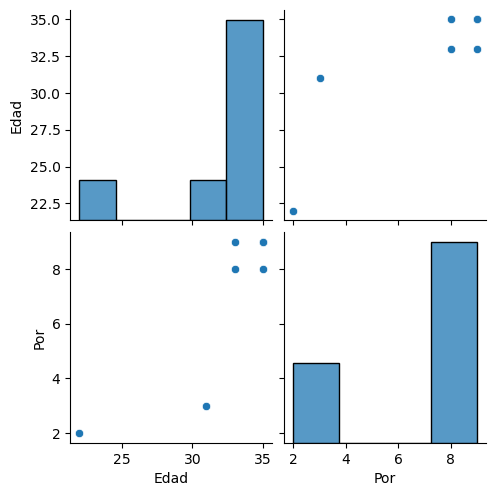

In [33]:
#Grafico pairplot
sns.pairplot(df_clase2)

In [35]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

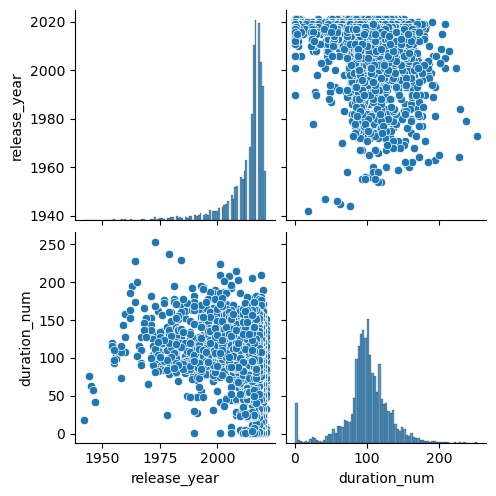

In [36]:
sns.pairplot(df)

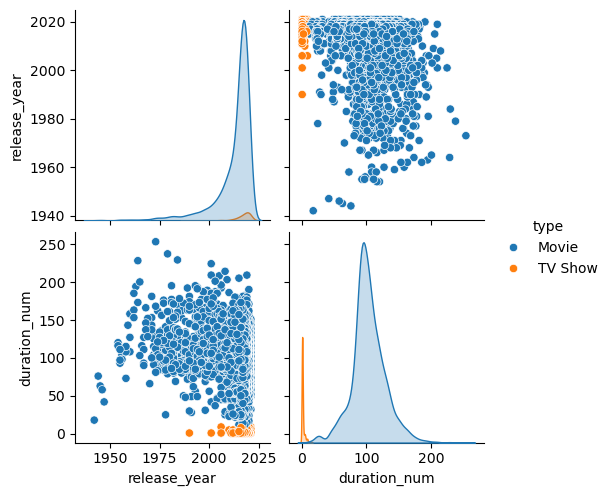

In [40]:
#df.head()
sns.pairplot(df, hue='type')